## Load repository

In [ ]:
%reset -f

If not already in google colab, use this link to open notebook there

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/bundschuhlab/IndelPolymorphismsModulateDistalRNAProteinInteractions/blob/main/generate_manuscript_figures.ipynb)

In [ ]:
!git clone https://github.com/bundschuhlab/IndelPolymorphismsModulateDistalRNAProteinInteractions.git

In [ ]:
import os
os.chdir("IndelsOnProteinBinding")

## Acquire Data

In [ ]:
#interact with plots
%matplotlib inline

In [ ]:
pip install pillow

In [ ]:
# importing libs
import sys
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.pylab as pl
import os

In [ ]:
# global variables to help with opening files

footprint = 7
iterations = 4000
omit_region = 50

seq_length150 = 150
seq_length250 = 250

blues = pl.cm.jet(np.linspace(0,1,18))

In [ ]:
#############################################################################
# random transripts
#############################################################################

#150 nucleotide transcripts
dev_infilename1507 = 'randomData/DEL_' + str(footprint) + '_' + str(iterations) + '_' + str(omit_region) + '_' + str(seq_length150) +'_dev.dat'
dev_infile1507 = open(dev_infilename1507, 'r')
avg_infilename1507 = 'randomData/DEL_' + str(footprint) + '_' + str(iterations) + '_' + str(omit_region) + '_' + str(seq_length150) +'_avg.dat'
avg_infile1507 = open(avg_infilename1507, 'r')

#250 nucleotide transcripts
dev_infilename2507 = 'randomData/DEL_' + str(footprint) + '_' + str(iterations) + '_' + str(omit_region) + '_' + str(seq_length250) +'_dev.dat'
dev_infile2507 = open(dev_infilename2507, 'r')

#############################################################################
# 150 nucleotide human transcripts
# transripts chosen to be proximal (<200 nucleotides) to known binding sites
#############################################################################

# synthetic indels
# arbitrary binding sites
infilename_dev_ddg_likeRandomNoIndels_150 = "dataHuman/likeRandomNoIndels/likeRandom150_dev.dat"
infile_dev_ddg_likeRandomNoIndels_150 = open(infilename_dev_ddg_likeRandomNoIndels_150, 'r')

# synthetic indels (approx 25 nts from real indels)
# arbitrary binding sites
infilename_dev_ddg_likeRandom_150 = "dataHuman/likeRandom/likeRandom150_dev.dat"
infile_dev_ddg_likeRandom_150 = open(infilename_dev_ddg_likeRandom_150, 'r')

# real indels
# arbitrary binding sites
infilename_dev_ddg_likeRandomIndels_150 = "dataHuman/varySites/varySites150_dev.dat"
infile_dev_ddg_likeRandomIndels_150 = open(infilename_dev_ddg_likeRandomIndels_150, 'r')
infilename_avg_ddg_likeRandomIndels_150 = "dataHuman/varySites/varySites150_avg.dat"
infile_avg_ddg_likeRandomIndels_150 =  open(infilename_avg_ddg_likeRandomIndels_150, 'r')

# real indels HuR
# bindings sites translated by 300 nucleotides
infilename_dev_ddg_human_150_all_bad = "dataHuman/badSites/variationDDG.txt"
infile_dev_ddg_human_150_all_bad = open(infilename_dev_ddg_human_150_all_bad, 'r')

# real indels | real binding sites
infilename_dev_ddg_human_150_all = "dataHuman/SameSites/variationDDG.txt"
infile_dev_ddg_human_150_all = open(infilename_dev_ddg_human_150_all, 'r')

############################################################
# 150 nucleotide human transcripts
# transripts NOT chosen to be proximal to known binding sites
#############################################################

# synthetic indels (approx 25 nts from real indels)
# arbitrary binding sites
infilename_dev_ddg_likeRandomHumanNoBS_150 = "dataHumanNoBS/likeRandom/likeRandom150_dev.dat"
infile_dev_ddg_likeRandomHumanNoBS_150 = open(infilename_dev_ddg_likeRandomHumanNoBS_150, 'r')

# synthetic indels
# arbitrary binding sites
infilename_dev_ddg_likeRandomNoIndelsHumanNoBS_150 = "dataHumanNoBS/likeRandomNoIndels/likeRandom150_dev.dat"
infile_dev_ddg_likeRandomNoIndelsHumanNoBS_150 = open(infilename_dev_ddg_likeRandomNoIndelsHumanNoBS_150, 'r')

# real indels
# arbitrary binding sites
infilename_dev_ddg_likeRandomIndelsHumanNoBS_150 = "dataHumanNoBS/varySites/varySites150_dev.dat"
infile_dev_ddg_likeRandomIndelsHumanNoBS_150 = open(infilename_dev_ddg_likeRandomIndelsHumanNoBS_150, 'r')


In [ ]:
#method to obtain data from files

def obtain_plot_data(file):
    all_columns = []

    column_headers =  file.readline().split()[1:]

    for name in column_headers:
        x="_"+name
        exec("%s = []" % (x))

    file.seek(0)

    for line in file:
        fields = line.split()
        if fields[0] != '#':
            for i in range(len(fields)):
                exec("%s.append(float(fields[i]))" % ("_"+column_headers[i]))

    for name in column_headers:
        x="_"+name
        exec("all_columns.append(%s)" % (x))

    file.seek(0)

    return [all_columns, column_headers]

In [ ]:
#assign data to variables

averages1507 = obtain_plot_data(avg_infile1507)
deviations1507 = obtain_plot_data(dev_infile1507)
deviations2507 = obtain_plot_data(dev_infile2507)

deviation_ddg_human_150_all = obtain_plot_data(infile_dev_ddg_human_150_all)
deviation_ddg_human_150_all_bad = obtain_plot_data(infile_dev_ddg_human_150_all_bad)
deviation_ddg_likeRandom_150 = obtain_plot_data(infile_dev_ddg_likeRandom_150)
deviation_ddg_likeRandomNoIndels_150 = obtain_plot_data(infile_dev_ddg_likeRandomNoIndels_150)
averages_ddg_likeRandomIndels_150 = obtain_plot_data(infile_avg_ddg_likeRandomIndels_150)
deviation_ddg_likeRandomIndels_150 = obtain_plot_data(infile_dev_ddg_likeRandomIndels_150)

deviation_ddg_likeRandomHumanNoBS_150 = obtain_plot_data(infile_dev_ddg_likeRandomHumanNoBS_150)
deviation_ddg_likeRandomIndelsHumanNoBS_150 = obtain_plot_data(infile_dev_ddg_likeRandomIndelsHumanNoBS_150)
deviation_ddg_likeRandomNoIndelsHumanNoBS_150 = obtain_plot_data(infile_dev_ddg_likeRandomNoIndelsHumanNoBS_150)


In [ ]:
#method to obtain data for more plots

def obtain_more_data(datalist, seq_length, sub_seq):
    protein_start = seq_length - (sub_seq/2) + 1
    c = protein_start + 30
    b = protein_start + 20
    a = protein_start + 10

    position_list = [int(protein_start), int(a), int(b), int(c)]

    position_list_index=[]
    free_energies = []
    del_dict = {}

    del_list = [i+1 for i in range(5)] + [5*(i+2) for i in range(9)]

    deletion_column = 2
    for item in del_list:
        del_dict[item] = deletion_column
        deletion_column += 1

    ######################################################################################

    for item in position_list:  #index of items in position list in the sequence of consecutive positions from the file
        position_list_index.append([int(x) for x in datalist[0][0]].index(item))

    for p in position_list_index:
        intermediate = []
        for d in datalist[0]:
            if datalist[0].index(d) in del_dict.values():
                intermediate.append(d[p])
        free_energies.append(intermediate)

    return [del_list, free_energies, position_list]

def obtain_more_data_hybrid(datalist):
    protein_start = 1
    c = protein_start + 30
    b = protein_start + 20
    a = protein_start + 10

    position_list = [int(protein_start), int(a), int(b), int(c)]

    position_list_index=[]
    free_energies = []
    del_dict = {}

    del_list = [i+1 for i in range(5)]

    deletion_column = 2
    for item in del_list:
        del_dict[item] = deletion_column
        deletion_column += 1

    ######################################################################################

    for item in position_list:  #index of items in position list in the sequence of consecutive positions from the file
        position_list_index.append([int(x) for x in datalist[0][0]].index(item))

    for p in position_list_index:
        intermediate = []
        for d in datalist[0]:
            if datalist[0].index(d) in del_dict.values():
                intermediate.append(d[p])
        free_energies.append(intermediate)

    return [del_list, free_energies, position_list]


def obtain_more_data_human(datalist):
    protein_start = -1;
    c = protein_start + 30
    b = protein_start + 20
    a = protein_start + 10

    position_list = [int(protein_start), int(a), int(b), int(c)]

    position_list_index=[]
    free_energies = []
    del_dict = {}

    del_list = [i+1 for i in range(5)]

    deletion_column = 2
    for item in del_list:
        del_dict[item] = deletion_column
        deletion_column += 1

    ######################################################################################

    for item in position_list:  #index of items in position list in the sequence of consecutive positions from the file
        position_list_index.append([int(x) for x in datalist[0][0]].index(item))

    for p in position_list_index:
        intermediate = []
        for d in datalist[0]:
            if datalist[0].index(d)+1 in del_dict.values():
                intermediate.append(d[p])
        free_energies.append(intermediate)

    return [del_list, free_energies, position_list]



In [ ]:
# @title
#assign data to appropriate variables

averages1507_b = obtain_more_data(averages1507, 150, 100)
deviations1507_b = obtain_more_data(deviations1507, 150, 100)
deviations2507_b = obtain_more_data(deviations2507, 250, 200)

deviation_ddg_likeRandom_150_b = obtain_more_data(deviation_ddg_likeRandom_150, 150, 100)
averages_ddg_likeRandomIndels_150_b = obtain_more_data_hybrid(averages_ddg_likeRandomIndels_150)
deviation_ddg_likeRandomIndels_150_b = obtain_more_data_hybrid(deviation_ddg_likeRandomIndels_150)
deviation_ddg_likeRandomNoIndels_150_b = obtain_more_data(deviation_ddg_likeRandomNoIndels_150, 150, 100)

deviation_ddg_human_150_all_b = obtain_more_data_human(deviation_ddg_human_150_all)
deviation_ddg_human_150_all_bad_b = obtain_more_data_human(deviation_ddg_human_150_all_bad)

deviation_ddg_likeRandomHumanNoBS_150_b = obtain_more_data(deviation_ddg_likeRandomHumanNoBS_150, 150, 100)
deviation_ddg_likeRandomNoIndelsHumanNoBS_150_b = obtain_more_data(deviation_ddg_likeRandomNoIndelsHumanNoBS_150, 150, 100)
deviation_ddg_likeRandomIndelsHumanNoBS_150_b = obtain_more_data_hybrid(deviation_ddg_likeRandomIndelsHumanNoBS_150)

## Illustrate Results

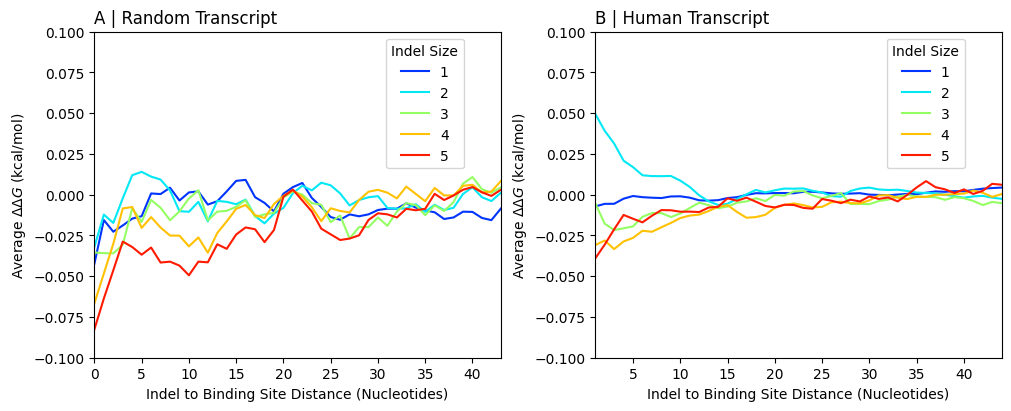

In [ ]:
#@title 1. Indels Equally Likely to Increase or Decrease RNA-Protein Binding Affinity {display-mode: "form"}

#@markdown Average $\Delta\Delta G$ is about 0.

fig = plt.figure(figsize=(10,4), constrained_layout=True)


plt.subplot(1,2,1)

xA1507 = [k-averages1507[0][0][0] for k in averages1507[0][0]]

for i in range(1,6):
    plt.plot(xA1507, averages1507[0][i+1], label = averages1507[1][i+1][0], color = blues[3*(i)])

plt.xlabel('Indel to Binding Site Distance (Nucleotides)', fontsize = 10)
plt.ylabel('Average $\Delta \Delta G$ (kcal/mol)')
plt.legend(bbox_to_anchor=(0.7,1), loc='upper left',  title='Indel Size')

plt.xlim(0, xA1507[-1])
plt.ylim(-0.1,0.1)

plt.title("A | Random Transcript", loc="left")

##############################################################################

plt.subplot(1,2,2)

xA_ddg_likeRandomIndels_150 = [k+1-averages_ddg_likeRandomIndels_150[0][0][0] for k in averages_ddg_likeRandomIndels_150[0][0]]

for i in range(1,6):
    plt.plot(xA_ddg_likeRandomIndels_150, averages_ddg_likeRandomIndels_150[0][i+1], label = averages_ddg_likeRandomIndels_150[1][i+1][0], color = blues[3*(i)])

plt.xlabel('Indel to Binding Site Distance (Nucleotides)')
plt.ylabel('Average $\Delta \Delta G$ (kcal/mol)')
plt.legend(bbox_to_anchor=(0.7,1), loc='upper left', title='Indel Size')

plt.xlim(1, xA_ddg_likeRandomIndels_150[-1])
plt.ylim(-0.1,0.1)

plt.title("B | Human Transcript", loc="left")


# fig.tight_layout(w_pad=0.5)

plt.savefig("figures/png/fig1.png", dpi=300)
plt.savefig("figures/eps/fig1.eps")
plt.savefig("figures/tiff/fig1.tif", dpi=300, format='tiff', pil_kwargs={"compression": "tiff_lzw"})
plt.savefig("figures/pdf/fig1.pdf", dpi=300)

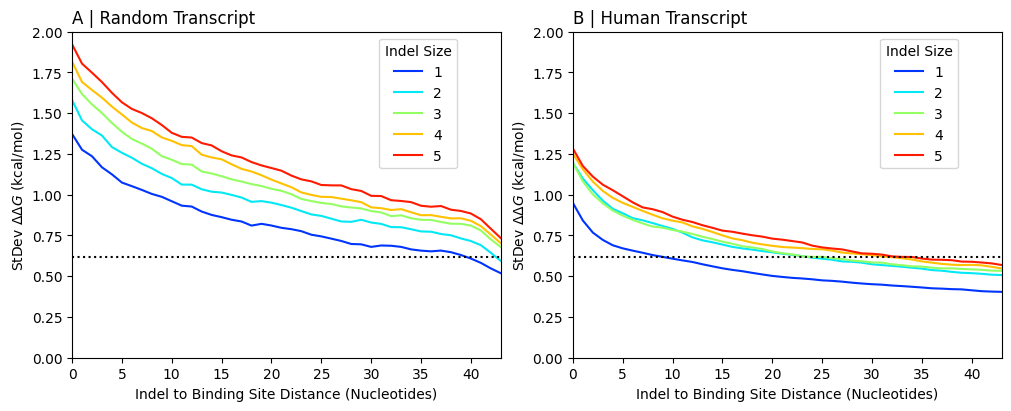

In [ ]:
#@title 2. Indels Significantly Affect Binding Affinity and this Effect Diminishes with Increasing Distance to the Binding Site {display-mode: "form"}

#@markdown Plots of the Standard Deviation of $\Delta\Delta G$ vs Distance to Deletion trend downward.

fig = plt.figure(figsize=(10,4), constrained_layout=True)

plt.subplot(1,2,1)

xS1507 = [k-deviations1507[0][0][0] for k in deviations1507[0][0]]

for i in range(1,6):
    plt.plot(xS1507, deviations1507[0][i+1], label = deviations1507[1][i+1][0], color = blues[3*i])
plt.plot(xS1507, [0.616 for i in range(len(xS1507))], linestyle =":", color="black")

plt.xlabel('Indel to Binding Site Distance (Nucleotides)')
plt.ylabel('StDev $\Delta \Delta G$ (kcal/mol)')
plt.legend(bbox_to_anchor=(0.7,1), loc='upper left', title='Indel Size')

plt.xlim(0,xS1507[-1])
plt.ylim(0,2)

plt.title("A | Random Transcript", loc="left")


plt.subplot(1,2,2)

xS_ddg_likeRandomIndels_150 = [k-deviation_ddg_likeRandomIndels_150[0][0][0] for k in deviation_ddg_likeRandomIndels_150[0][0]]

for i in range(1,6):
    plt.plot(xS_ddg_likeRandomIndels_150, deviation_ddg_likeRandomIndels_150[0][i+1], label = deviation_ddg_likeRandomIndels_150[1][i+1][0], color = blues[3*(i)])
plt.plot(xS_ddg_likeRandomIndels_150, [0.616 for i in range(len(xS_ddg_likeRandomIndels_150))],linestyle =":", color="black")

plt.xlabel('Indel to Binding Site Distance (Nucleotides)')
plt.ylabel('StDev $\Delta \Delta G$ (kcal/mol)')
plt.legend(bbox_to_anchor=(0.7,1), loc='upper left', title='Indel Size')

#plt.ylim(0.5,2)
plt.xlim(0, xS_ddg_likeRandomIndels_150[-1])
plt.ylim(0,2)

plt.title("B | Human Transcript", loc="left")

#fig.tight_layout(w_pad=1)

plt.savefig("figures/png/fig2.png", dpi=300)
plt.savefig("figures/eps/fig2.eps")
plt.savefig("figures/tiff/fig2.tif", dpi=300, format='tiff', pil_kwargs={"compression": "tiff_lzw"})
plt.savefig("figures/pdf/fig2.pdf", dpi=300)


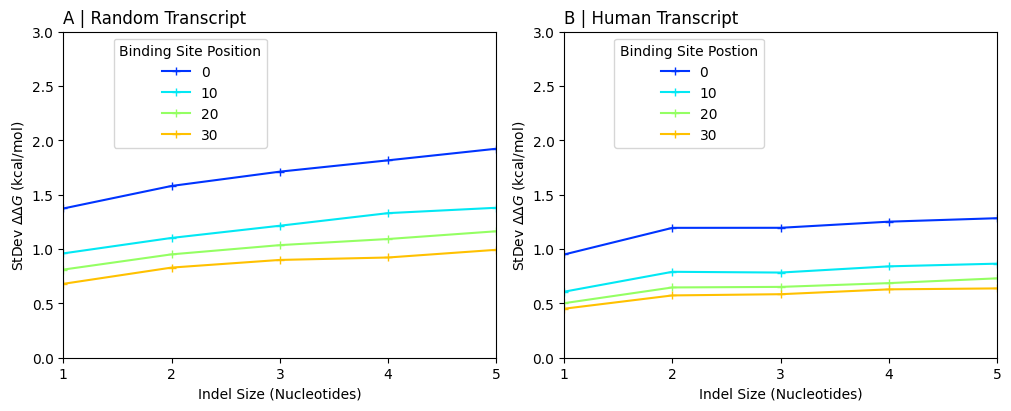

In [ ]:
#@title 3. Larger Indels have Bigger Effect on Binding Affinity {display-mode: "form"}

#@markdown Plots of Standard Deviation of $\Delta\Delta G$ vs Size of Deletion trend upwards.

fig = plt.figure(figsize=(10,4), constrained_layout=True)

plt.subplot(1,2,1)

for i in range(len(deviations1507_b[2])):
    plt.plot(deviations1507_b[0], deviations1507_b[1][i], marker="+", label = str(deviations1507_b[2][i]-deviations1507_b[2][0]), color = blues[(i+1)*3])

plt.xlabel('Indel Size (Nucleotides)')
plt.ylabel('StDev $\Delta \Delta G$ (kcal/mol)')
plt.legend(bbox_to_anchor=(0.1,1), loc='upper left', title='Binding Site Position')
plt.title("A | Random Transcript", loc ="left")

#plt.xlim([1,omit_region])
plt.xlim([1,5])
plt.ylim([0,3])

plt.xticks(range(1,6))

plt.subplot(1,2,2)

for i in range(len(deviation_ddg_likeRandomIndels_150_b[2])):
    plt.plot(deviation_ddg_likeRandomIndels_150_b[0], deviation_ddg_likeRandomIndels_150_b[1][i], marker="+", label = str(deviation_ddg_likeRandomIndels_150_b[2][i]-deviation_ddg_likeRandomIndels_150_b[2][0]), color = blues[(i+1)*3])

plt.xlabel('Indel Size (Nucleotides)')
plt.ylabel('StDev $\Delta \Delta G$ (kcal/mol)')
plt.legend(bbox_to_anchor=(0.1,1), loc='upper left', title='Binding Site Postion')
plt.title("B | Human Transcript", loc="left")



plt.xlim([1,5])
plt.ylim([0,3])

plt.xticks(range(1,6))

#fig.tight_layout(w_pad=1)

plt.savefig("figures/png/fig3.png", dpi=300)
plt.savefig("figures/eps/fig3.eps")
plt.savefig("figures/tiff/fig3.tif", dpi=300, format='tiff', pil_kwargs={"compression": "tiff_lzw"})
plt.savefig("figures/pdf/fig3.pdf", dpi=300)



### Indels with Random Features have Bigger Effect on Binding Affinity than more Natural Indels

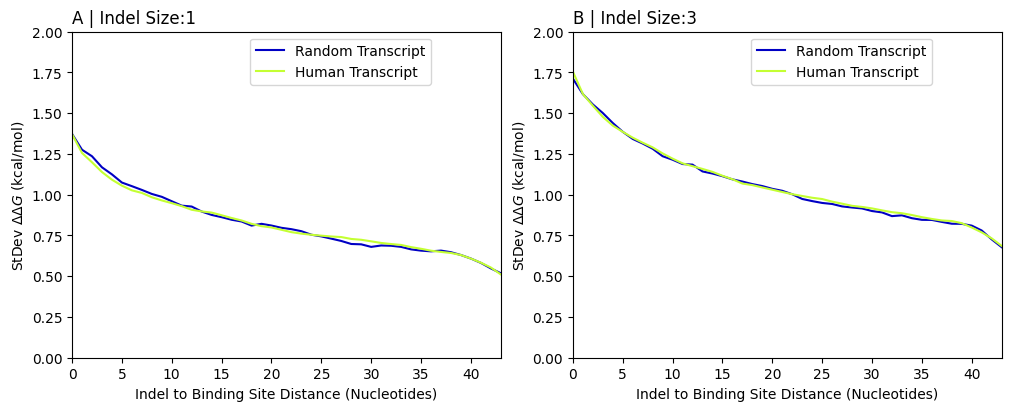

In [ ]:
#@title 4. Effect of Indels on Binding Affinity Similar in Random Transcripts and Human Transcripts {display-mode: "form"}

fig = plt.figure(figsize=(10,4), constrained_layout=True)

plt.subplot(1,2,1)

xS1507 = [k-deviations1507[0][0][0] for k in deviations1507[0][0]]
xS_ddg_likeRandomNoIndelsHumanNoBS_150 = [k-deviation_ddg_likeRandomNoIndelsHumanNoBS_150[0][0][0] for k in deviation_ddg_likeRandomNoIndelsHumanNoBS_150[0][0]]

plt.plot(xS1507, deviations1507[0][1+1], label = "Random Transcript", color = blues[1])
plt.plot(xS_ddg_likeRandomNoIndelsHumanNoBS_150, deviation_ddg_likeRandomNoIndelsHumanNoBS_150[0][1+1], label = "Human Transcript", color = blues[10])


plt.xlabel('Indel to Binding Site Distance (Nucleotides)')
plt.ylabel('StDev $\Delta \Delta G$ (kcal/mol)')
plt.legend(bbox_to_anchor=(0.4,1), loc='upper left')

plt.xlim(0,xS1507[-1])
plt.ylim(0,2)

plt.title("A | Indel Size:1", loc="left")


plt.subplot(1,2,2)

plt.plot(xS1507, deviations1507[0][3+1], label = "Random Transcript", color = blues[1])
plt.plot(xS_ddg_likeRandomNoIndelsHumanNoBS_150, deviation_ddg_likeRandomNoIndelsHumanNoBS_150[0][3+1], label = "Human Transcript", color = blues[10])


plt.xlabel('Indel to Binding Site Distance (Nucleotides)')
plt.ylabel('StDev $\Delta \Delta G$ (kcal/mol)')
plt.legend(bbox_to_anchor=(0.4,1), loc='upper left')

plt.xlim(0,xS1507[-1])
plt.ylim(0,2)

plt.title("B | Indel Size:3", loc="left")
#fig.tight_layout(w_pad=1)

plt.savefig("figures/png/fig4.png", dpi=300)
plt.savefig("figures/eps/fig4.eps")
plt.savefig("figures/tiff/fig4.tif", dpi=300, format='tiff', pil_kwargs={"compression": "tiff_lzw"})
plt.savefig("figures/pdf/fig4.pdf", dpi=300)

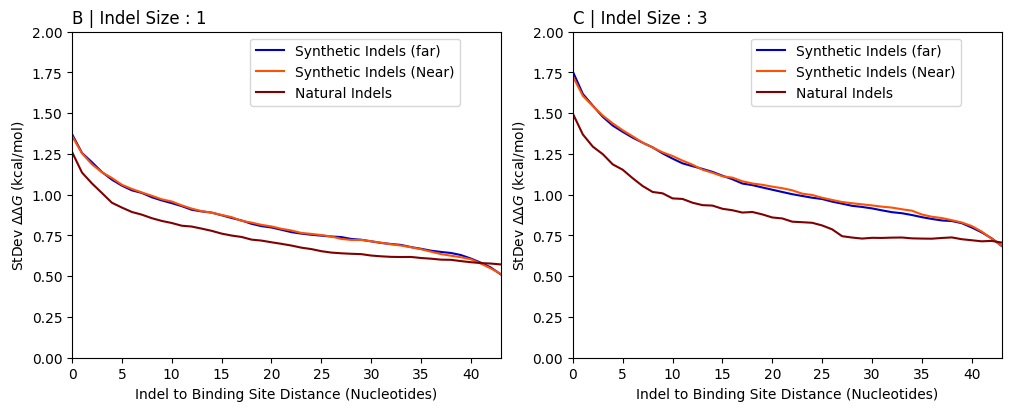

In [ ]:
#@title 5. There is a Gradual Decrease in Effect on Binding Affinity as we Simulate more Accurate Indels. {display-mode: "form"}

fig = plt.figure(figsize=(10,4), constrained_layout=True)
plt.subplot(1,2,1)


xS_ddg_likeRandomNoIndelsHumanNoBS_150 = [k-deviation_ddg_likeRandomNoIndelsHumanNoBS_150[0][0][0] for k in deviation_ddg_likeRandomNoIndelsHumanNoBS_150[0][0]]
xS_ddg_likeRandomHumanNoBS_150 = [k-deviation_ddg_likeRandomHumanNoBS_150[0][0][0] for k in deviation_ddg_likeRandomHumanNoBS_150[0][0]]
xS_ddg_likeRandomIndelsHumanNoBS_150 = [k-deviation_ddg_likeRandomIndelsHumanNoBS_150[0][0][0] for k in deviation_ddg_likeRandomIndelsHumanNoBS_150[0][0]]


plt.plot(xS_ddg_likeRandomNoIndelsHumanNoBS_150, deviation_ddg_likeRandomNoIndelsHumanNoBS_150[0][1+1], label = "Synthetic Indels (far)", color = blues[1])
plt.plot(xS_ddg_likeRandomHumanNoBS_150, deviation_ddg_likeRandomHumanNoBS_150[0][1+1], label = "Synthetic Indels (Near)", color = blues[14])
plt.plot(xS_ddg_likeRandomIndelsHumanNoBS_150, deviation_ddg_likeRandomIndelsHumanNoBS_150[0][1+1], label = "Natural Indels", color = blues[17])


plt.xlabel('Indel to Binding Site Distance (Nucleotides)')
plt.ylabel('StDev $\Delta \Delta G$ (kcal/mol)')
plt.legend(bbox_to_anchor=(0.4,1), loc='upper left')

plt.xlim(0,xS1507[-1])
plt.ylim(0,2)

plt.title("B | Indel Size : 1", loc="left")

plt.subplot(1,2,2)


plt.plot(xS_ddg_likeRandomNoIndelsHumanNoBS_150, deviation_ddg_likeRandomNoIndelsHumanNoBS_150[0][3+1], label = "Synthetic Indels (far)", color = blues[1])
plt.plot(xS_ddg_likeRandomHumanNoBS_150, deviation_ddg_likeRandomHumanNoBS_150[0][3+1], label = "Synthetic Indels (Near)", color = blues[14])
plt.plot(xS_ddg_likeRandomIndelsHumanNoBS_150, deviation_ddg_likeRandomIndelsHumanNoBS_150[0][3+1], label = "Natural Indels", color = blues[17])


plt.xlabel('Indel to Binding Site Distance (Nucleotides)')
plt.ylabel('StDev $\Delta \Delta G$ (kcal/mol)')
plt.legend(bbox_to_anchor=(0.4,1), loc='upper left')

plt.xlim(0,xS1507[-1])
plt.ylim(0,2)

plt.title("C | Indel Size : 3", loc="left")

#fig.tight_layout(pad=4.0)

plt.savefig("figures/png/fig5_part.png", dpi=300)
plt.savefig("figures/eps/fig5_part.eps")
plt.savefig("figures/tiff/fig5_part.tif", dpi=300, format='tiff', pil_kwargs={"compression": "tiff_lzw"})
plt.savefig("figures/pdf/fig5_part.pdf", dpi=300)



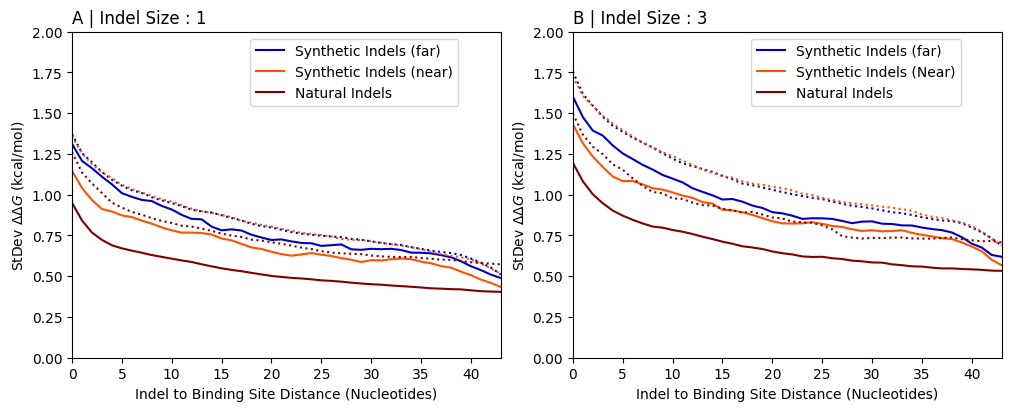

In [ ]:
#@title 6. Proximity to Real Binding Site Modulates the Effect of Indels on Binding Affinity {display-mode: "form"}

fig = plt.figure(figsize=(10,4), constrained_layout=True)

plt.subplot(1,2,1)


xS_ddg_likeRandomNoIndels_150 = [k-deviation_ddg_likeRandomNoIndels_150[0][0][0] for k in deviation_ddg_likeRandomNoIndels_150[0][0]]
xS_ddg_likeRandom_150 = [k-deviation_ddg_likeRandom_150[0][0][0] for k in deviation_ddg_likeRandom_150[0][0]]
xS_ddg_likeRandomIndels_150 = [k-deviation_ddg_likeRandomIndels_150[0][0][0] for k in deviation_ddg_likeRandomIndels_150[0][0]]


plt.plot(xS_ddg_likeRandomNoIndels_150, deviation_ddg_likeRandomNoIndels_150[0][1+1], label = "Synthetic Indels (far)", color = blues[1])
plt.plot(xS_ddg_likeRandom_150, deviation_ddg_likeRandom_150[0][1+1], label = "Synthetic Indels (near)", color = blues[14])
plt.plot(xS_ddg_likeRandomIndels_150, deviation_ddg_likeRandomIndels_150[0][1+1], label = "Natural Indels", color = blues[17])

plt.plot(xS_ddg_likeRandomNoIndelsHumanNoBS_150, deviation_ddg_likeRandomNoIndelsHumanNoBS_150[0][1+1], ':', color = blues[1])
plt.plot(xS_ddg_likeRandomHumanNoBS_150, deviation_ddg_likeRandomHumanNoBS_150[0][1+1], ':', color = blues[14])
plt.plot(xS_ddg_likeRandomIndelsHumanNoBS_150, deviation_ddg_likeRandomIndelsHumanNoBS_150[0][1+1], ':', color = blues[17])


plt.xlabel('Indel to Binding Site Distance (Nucleotides)')
plt.ylabel('StDev $\Delta \Delta G$ (kcal/mol)')
plt.legend(bbox_to_anchor=(0.4,1), loc='upper left')

plt.xlim(0,xS1507[-1])
plt.ylim(0,2)

plt.title("A | Indel Size : 1", loc="left")

plt.subplot(1,2,2)


plt.plot(xS_ddg_likeRandomNoIndels_150, deviation_ddg_likeRandomNoIndels_150[0][3+1], label = "Synthetic Indels (far)", color = blues[1])
plt.plot(xS_ddg_likeRandom_150, deviation_ddg_likeRandom_150[0][3+1], label = "Synthetic Indels (Near)", color = blues[14])
plt.plot(xS_ddg_likeRandomIndels_150, deviation_ddg_likeRandomIndels_150[0][3+1], label = "Natural Indels", color = blues[17])

plt.plot(xS_ddg_likeRandomNoIndelsHumanNoBS_150, deviation_ddg_likeRandomNoIndelsHumanNoBS_150[0][3+1], ':', color = blues[1])
plt.plot(xS_ddg_likeRandomHumanNoBS_150, deviation_ddg_likeRandomHumanNoBS_150[0][3+1], ':', color = blues[14])
plt.plot(xS_ddg_likeRandomIndelsHumanNoBS_150, deviation_ddg_likeRandomIndelsHumanNoBS_150[0][3+1], ':', color = blues[17])


plt.xlabel('Indel to Binding Site Distance (Nucleotides)')
plt.ylabel('StDev $\Delta \Delta G$ (kcal/mol)')
plt.legend(bbox_to_anchor=(0.4,1), loc='upper left')

plt.xlim(0,xS1507[-1])
plt.ylim(0,2)

plt.title("B | Indel Size : 3", loc="left")


#fig.tight_layout(pad=4.0)
plt.savefig("figures/png/fig6.png", dpi=300)
plt.savefig("figures/eps/fig6.eps")
plt.savefig("figures/tiff/fig6.tif", dpi=300, format='tiff', pil_kwargs={"compression": "tiff_lzw"})
plt.savefig("figures/pdf/fig6.pdf", dpi=300)


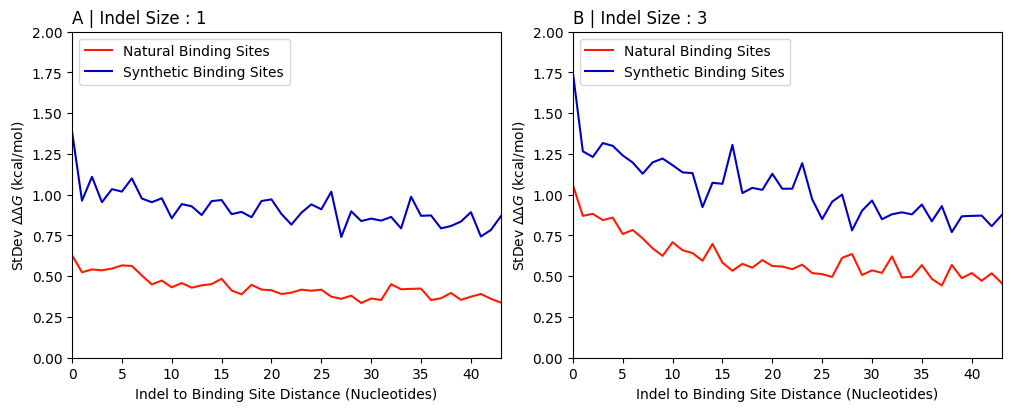

In [ ]:
#@title 7. Effect of Indels on Binding Affinity Minimized at Real Binding Sites {display-mode: "form"}

fig = plt.figure(figsize=(10,4), constrained_layout=True)

plt.subplot(1,2,1)


xS_ddg_likeRandomIndels_150 = [k-deviation_ddg_likeRandomIndels_150[0][0][0] for k in deviation_ddg_likeRandomIndels_150[0][0]]
xS_ddg_human_150_all = [k for k in deviation_ddg_human_150_all[0][0]]
xS_ddg_human_150_all_bad = [k for k in deviation_ddg_human_150_all_bad[0][0]]

#plt.plot(xS_ddg_likeRandomIndels_150, deviation_ddg_likeRandomIndels_150[0][0+1], label = "True Indels and Arbitrary Binding Sites", color = blues[1])
plt.plot(xS_ddg_human_150_all, deviation_ddg_human_150_all[0][0+1], label = "Natural Binding Sites", color = blues[15])
plt.plot(xS_ddg_human_150_all_bad, deviation_ddg_human_150_all_bad[0][0+1], label = "Synthetic Binding Sites", color = blues[1])


plt.xlabel('Indel to Binding Site Distance (Nucleotides)')
plt.ylabel('StDev $\Delta \Delta G$ (kcal/mol)')
plt.legend(bbox_to_anchor=(0,1), loc='upper left')

plt.xlim(0,xS1507[-1])
plt.ylim(0,2)

plt.title("A | Indel Size : 1", loc="left")


plt.subplot(1,2,2)


#plt.plot(xS_ddg_likeRandomIndels_150, deviation_ddg_likeRandomIndels_150[0][3+1], label = "True Indels and Arbitrary Binding Sites", color = blues[1])
plt.plot(xS_ddg_human_150_all, deviation_ddg_human_150_all[0][3+1], label = "Natural Binding Sites", color = blues[15])
plt.plot(xS_ddg_human_150_all_bad, deviation_ddg_human_150_all_bad[0][3+1], label = "Synthetic Binding Sites", color = blues[1])


plt.xlabel('Indel to Binding Site Distance (Nucleotides)')
plt.ylabel('StDev $\Delta \Delta G$ (kcal/mol)')
plt.legend(bbox_to_anchor=(0,1), loc='upper left')

plt.xlim(0,xS1507[-1])
plt.ylim(0,2)

plt.title("B | Indel Size : 3", loc="left")


#fig.tight_layout(pad=4.0)

plt.savefig("figures/png/fig7.png", dpi=300)
plt.savefig("figures/eps/fig7.eps")
plt.savefig("figures/tiff/fig7.tif", dpi=300, format='tiff', pil_kwargs={"compression": "tiff_lzw"})
plt.savefig("figures/pdf/fig7.pdf", dpi=300)



## Supplementary Figures

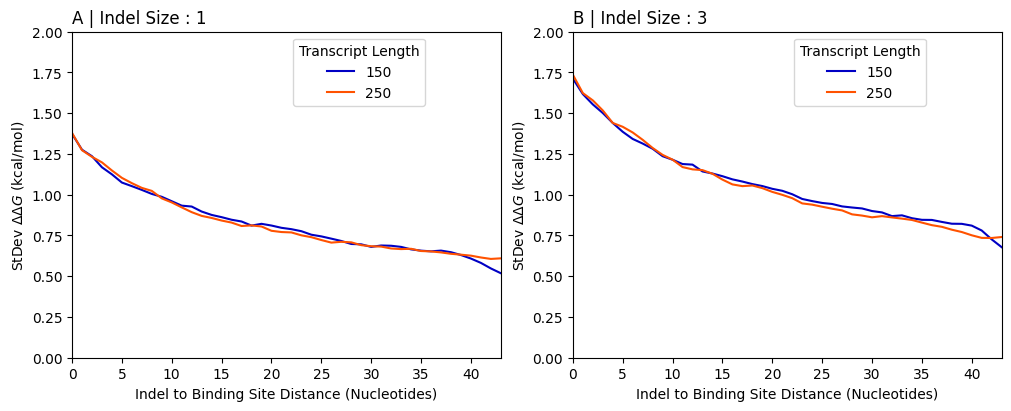

In [ ]:
#@title S1. Shorter RNA Transcripts can be used to Model Longer Ones {display-mode: "form"}

#@markdown Similar Plots For Standard Deviation of $\Delta\Delta G$ vs Distance to Deletion for different transcript lengths

fig = plt.figure(figsize=(10,4), constrained_layout=True)
plt.subplot(1,2,1)

xS1507 = [k-deviations1507[0][0][0] for k in deviations1507[0][0]]
xS2507 = [k-deviations2507[0][0][0] for k in deviations2507[0][0]]

plt.plot(xS1507, deviations1507[0][1+1], label = "150", color = blues[1])
plt.plot(xS2507, deviations2507[0][1+1], label = "250", color = blues[14])

plt.xlabel('Indel to Binding Site Distance (Nucleotides)')
plt.ylabel('StDev $\Delta \Delta G$ (kcal/mol)')
plt.legend(bbox_to_anchor=(0.5,1), loc='upper left', title="Transcript Length")

plt.xlim(0,xS1507[-1])
plt.ylim(0,2)

plt.title("A | Indel Size : 1", loc="left")



plt.subplot(1,2,2)

xS1507 = [k-deviations1507[0][0][0] for k in deviations1507[0][0]]
xS2507 = [k-deviations2507[0][0][0] for k in deviations2507[0][0]]

plt.plot(xS1507, deviations1507[0][3+1], label = "150", color = blues[1])
plt.plot(xS2507, deviations2507[0][3+1], label = "250", color = blues[14])

plt.xlabel('Indel to Binding Site Distance (Nucleotides)')
plt.ylabel('StDev $\Delta \Delta G$ (kcal/mol)')
plt.legend(bbox_to_anchor=(0.5,1), loc='upper left', title="Transcript Length")

plt.xlim(0,xS1507[-1])
plt.ylim(0,2)

plt.title("B | Indel Size : 3", loc="left")

#fig.tight_layout(pad=4.0)

plt.savefig("figures/png/figS1.png", dpi=300)
plt.savefig("figures/eps/figS1.eps")
plt.savefig("figures/tiff/figS1.tif", dpi=300, format='tiff', pil_kwargs={"compression": "tiff_lzw"})
plt.savefig("figures/pdf/figS1.pdf", dpi=300)

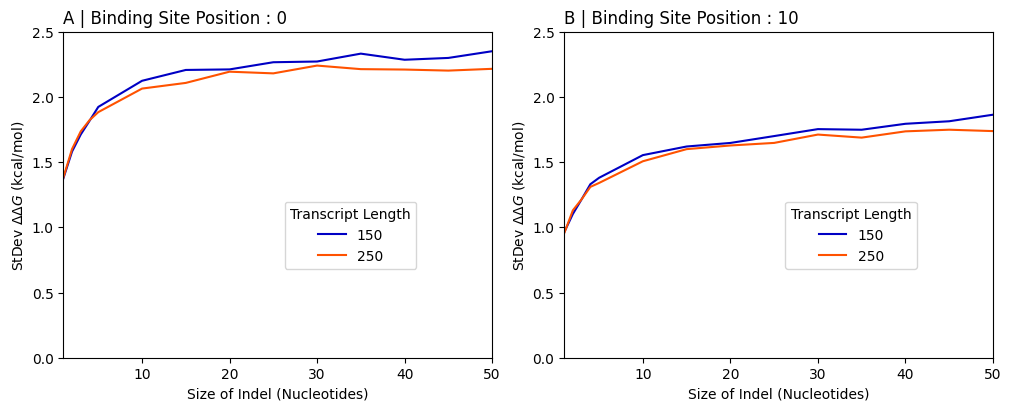

In [ ]:
#plot

#@title S2. Shorter RNA Transcripts can be used to Model Longer Ones {display-mode: "form"}

#@markdown Similar Plots of Standard Deviation of $\Delta\Delta G$ vs Size of Deletion for different transcript lengths

fig = plt.figure(figsize=(10,4), constrained_layout=True)
plt.subplot(1,2,1)


plt.plot(deviations1507_b[0], deviations1507_b[1][0], label = "150", color = blues[1])
plt.plot(deviations2507_b[0], deviations2507_b[1][0], label = "250", color = blues[14])


plt.xlabel('Size of Indel (Nucleotides)')
plt.ylabel('StDev $\Delta \Delta G$ (kcal/mol)')
plt.legend(bbox_to_anchor=(0.5,0.5), loc='upper left', title="Transcript Length")
plt.title("A | Binding Site Position : 0", loc="left")

plt.xlim([1,omit_region])
plt.ylim([0,2.5])


plt.subplot(1,2,2)


plt.plot(deviations1507_b[0], deviations1507_b[1][1], label = "150", color = blues[1])
plt.plot(deviations2507_b[0], deviations2507_b[1][1], label = "250", color = blues[14])


plt.xlabel('Size of Indel (Nucleotides)')
plt.ylabel('StDev $\Delta \Delta G$ (kcal/mol)')
plt.legend(bbox_to_anchor=(0.5,0.5), loc='upper left', title="Transcript Length")
plt.title("B | Binding Site Position : 10", loc="left")

plt.xlim([1,omit_region])
plt.ylim([0,2.5])

#fig.tight_layout(pad=4.0)

plt.savefig("figures/png/figS2.png", dpi=300)
plt.savefig("figures/eps/figS2.eps")
plt.savefig("figures/tiff/figS2.tif", dpi=300, format='tiff', pil_kwargs={"compression": "tiff_lzw"})
plt.savefig("figures/pdf/figS2.pdf", dpi=300)

## Close Files

In [ ]:
# closing files

dev_infile1507.close()
dev_infile2507.close()
avg_infile1507.close()

infile_dev_ddg_human_150_all.close()
infile_dev_ddg_human_150_all_bad.close()

infile_dev_ddg_likeRandom_150.close()
infile_dev_ddg_likeRandomNoIndels_150.close()
infile_dev_ddg_likeRandomIndels_150.close()

infile_avg_ddg_likeRandomIndels_150.close()

infile_dev_ddg_likeRandomHumanNoBS_150.close()
infile_dev_ddg_likeRandomNoIndelsHumanNoBS_150.close()
infile_dev_ddg_likeRandomIndelsHumanNoBS_150.close()